# DFAnalyzer Simple Example

This notebook will guide you to load a trace file generated by DFTracer and analyze the trace events using Dask.

In [1]:
%load_ext autoreload
%autoreload 2

## System imports for the notebook

In [2]:

import os
from pathlib import Path
import sys

## We add the analysis code to path so that we can run this in dev mode.

In [15]:
app_root = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, app_root)

## Imports for the notebook

This may take some time as it initializes Dask.

In [4]:
# Importing DFAnalyzer
import dfanalyzer
print(dfanalyzer.__file__)
from dfanalyzer.main import DFAnalyzer, update_dft_configuration, setup_logging, setup_dask_cluster, reset_dask_cluster

/usr/WS2/haridev/dftracer/dfanalyzer/__init__.py


## Initialize DFAnalyzer Configuration

In this function, we can tune DFAnalyzer for the analysis. For example, we can tune number of workers, connect to existing dask cluster, etc.

In [5]:
conf = update_dft_configuration(verbose=True, workers=4, log_file=f"./df_{os.getenv('USER')}.log")

## This methods sets up logging for DFAnalyzer.

This is needed for debugging and progress tracking. All prints seen in the following cells are configured in this method.

In [6]:
setup_logging()

## Setup dask cluster.

In this example, we use Dask Local cluster which will use multiprocessing on the same node where the notebook is running to run its workers.

**NOTE:** If your running on Remote VSCode on a cluster, you can tunnel the port and open it locally.

In [7]:
setup_dask_cluster()

[INFO] [10:11:57] Initialized Client with 4 workers and link http://127.0.0.1:8787/status [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:669]


On clicking the link, you will see a daskboard like this. [Dask Daskboard Image](images/dask-dashboard-load.png)

## Reset Dask Cluster

In case you have an error and want to clean the cluster for fresh analysis. You can run this.

In [8]:
reset_dask_cluster()

2024-07-10 10:11:57,752 - distributed.nanny - WARNING - Restarting worker
2024-07-10 10:11:57,768 - distributed.nanny - WARNING - Restarting worker
2024-07-10 10:11:57,797 - distributed.nanny - WARNING - Restarting worker
2024-07-10 10:11:57,815 - distributed.nanny - WARNING - Restarting worker


[INFO] [10:11:59] Restarting all workers [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:657]


## Load the DFAnalyzer Trace

The DFAnalyzer class take a regex string as input. For example, "{app_root}/examples/dfanalyzer/*.pfw.gz"

In [9]:
analyzer = DFAnalyzer(f"{app_root}/examples/dfanalyzer/test-trace.pfw.gz")

[INFO] [10:12:00] Created index for 1 files [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:366]
[INFO] [10:12:00] Total size of all files are <dask.bag.core.Item object at 0x1555404dfd60> bytes [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:368]
[INFO] [10:12:00] Loading 6 batches out of 1 files and has 93895 lines overall [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:381]
[INFO] [10:12:03] Loaded events [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:423]
[INFO] [10:12:03] Loaded plots with slope threshold: 45 [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:429]


## Analyze the events

1. The dask dataframe is stored at `analyzer.events`. 
2. We can run dask queries on this dataframe.

In [10]:
analyzer.events.head()

,name,cat,pid,tid,ts,te,dur,tinterval,trange,hostname,compute_time,io_time,app_io_time,total_time,filename,phase,size
0,TorchFramework.__init__,ai_framework,0,338684,6205258,6205266,8,<NA>,6.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
1,TorchFramework.is_nativeio_available,ai_framework,0,338684,6205293,6205294,1,<NA>,6.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
2,FileStorage.__init__,storage,0,338684,19,6205309,6205290,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
3,FileStorage.create_namespace,storage,0,338684,6205338,6205365,27,<NA>,6.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
4,DLIOBenchmark.__init__,dlio_benchmark,0,338684,0,7484573,7484573,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>


### Summary 

DFAnalyzer supports a summary utility that gives a brief summary of the job and its I/O access behavior.

In [11]:
items = analyzer.summary()
items

[INFO] [10:12:07] Total number of events in the workload are 93893 [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:521]


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  Allocation    Scheduler Allocation Details                                                                     │
│                ├── Nodes: 1                                                                                     │
│                ├── Processes: 1                                                                                 │
│                ├── Thread allocations across nodes (includes dynamically created threads)                       │
│                │   ├── Compute: 0                                                                               │
│                │   └── I/O: 21                                                                                  │
│                └── Events Recorded: 94K                                                                         │
│  Dataset       Description of Dataset Used                                                                      │
│                └── Files: 103                                                                                   │
│  I/O Behavior  Behavior of Application                                                                          │
│                ├── Split of Time in application                                                                 │
│                │   ├── Total Time: 105.211 sec                                                                  │
│                │   └── Overall I/O: 54.896 sec                                                                  │
│                └── Metrics by function                                                                          │
│                    ├── Function       |count |                  size                   |                        │
│                    ├──                |      |min   |25    |mean  |median|75    |max   |                        │
│                    ├── opendir        |42    |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── __xstat64      |42    |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── open64         |139   |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── __fxstat64     |278   |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── lseek64        |82K   |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── read           |6K    |NA    |4MB   |4MB   |4MB   |4MB   |4MB   |                        │
│                    └── close          |119   |NA    |nan   |nan   |NA    |nan   |NA    |                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### Timeline plots

We support two timeline plots:
1. how I/O time and I/O bandwidth changes over time.
2. how transfer size changes over time.

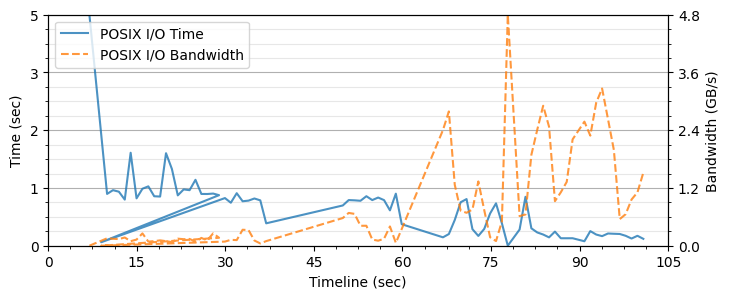

In [12]:
fig, ax1, ax2 = analyzer.plots.time_bw_timeline(
    bw_unit='gb',
    figsize=(8, 3),
    line1_label='POSIX I/O Time',
    line2_label='POSIX I/O Bandwidth',
    time_col='io_time',
    x_num_ticks=8,
    y_num_ticks=5,
)

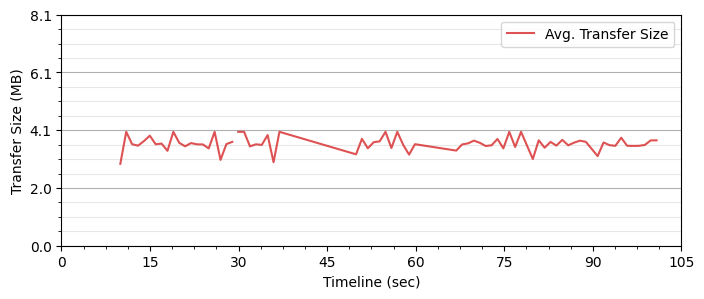

In [14]:
fig, ax = analyzer.plots.xfer_size_timeline(
    figsize=(8, 3),
    unit='mb',
    x_num_ticks=8,
)